# Classification Model to predict Diabetes

**Logistic Regression, Cross entropy and Gradient Descent**

Diabetes is a life style disease affecting lot of people today. Given age, we will build a model to predict if a person will have diabetes or not. In real life, we will need more variables like glucose level, insulin resistance etc., to do this prediction correctly. 

The problem is to identify the right category/class a person belongs to given the inputs. The prediction/output is a categorical variable, so this method is known as classification. We have just two categories (yes/no) in this case, the method is known as binary classification. 

Plan:

1. Define a toy dataset (data based approach)
2. Introduce Logistic Regression model, sigmoid function
3. Introduct Cross-Entropy loss function
4. Use Gradient descent for optimization

In [1]:
# Create the toy dataset
X = [10, 20, 25, 35, 21, 54, 68, 75, 20, 80] # Age of the person
y = [0, 0, 0, 1, 0, 1, 0, 1, 0, 1]            # 0 - No diabetes, 1 - Has diabetes

In [2]:
# Few python package imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

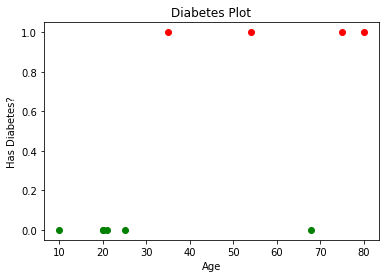

In [4]:
# People with diabetes are shown in red, and others are in green
def plot_data():
    # Find all indices where y is 0.
    idx_0 = np.where(y==0)
    idx_1 = np.where(y==1)
    plt.scatter(X[idx_0], y[idx_0], color='green')
    plt.scatter(X[idx_1], y[idx_1], color='red')
    plt.title('Diabetes Plot')
    plt.xlabel('Age')
    plt.ylabel('Has Diabetes?')

plot_data()

Our data shows that some people are not diabetic even in old age. On the other hand, it is possible to be a diabetic even at an younger age. It will be difficult to handcode a rule to learn this phenomenon. We will try and build a model.

## We need sigmoid

If you look at the output variable it is categorical, and has distinct values. It is either 0 or 1. 

If you remember, when we trained regression model (y=w.x), we adjusted the value of 'w' until the value of y from the model (yhat) got close to the actual value (y). 

In the classification case though, we can't use the output of y=wx directly and we have to squash it somehow to bring it closer to either 0 or 1. (classification outputs). This is actually done by this function sigmoid.

The sigmoid function is : $s(x)= \frac {1}{1+e^{-x}}$

Our model is $y=wx+b$ So, after applying sigmoid, model becomes: $s(x)= \frac {1}{1+e^{-wx+b}}$

In [5]:
# Now let's implement sigmoid 
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

Text(0, 0.5, 'Sigmoid value')

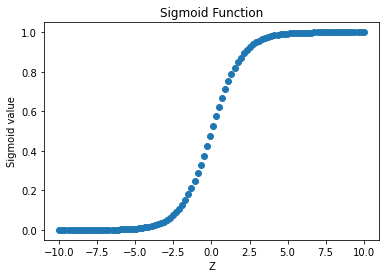

In [6]:
# Draw the sigmoid function
zs = []
sigs = []
for z in np.linspace(-10, 10, 100):
    zs.append(z)
    sigs.append(sigmoid(z))
    
plt.scatter(zs, sigs)
plt.title("Sigmoid Function")
plt.xlabel('Z')
plt.ylabel('Sigmoid value')

As you can see, sigmoid squashes any numbers between [0 1]. Large negative numbers are squashed to 0, while large positive ones are squashed to 1.

In [7]:
# Sigmoid of some numbers
print(f"Sigmoid of zero : {sigmoid(0)} ")
print(f"Sigmoid of 1 : {sigmoid(1)} ")
print(f"Sigmoid of -1 : {sigmoid(-1)} ")

Sigmoid of zero : 0.5 
Sigmoid of 1 : 0.7310585786300049 
Sigmoid of -1 : 0.2689414213699951 


## Problem Definition 

Now, we have defined our model. From our dataset, we have x and y. Our goal is to find the optimal value of parameters (w, b). Now this is similar to our linear regression. 

Note: This time, we are also including bias (b) as a parameter along with w. 

This is great, we can apply our loss function/GD based learning framework to find the parameters.

**Framework:**
1. Assume some initial value for the parameters.
2. Using the initial parameters, calculate yhat for all examples in the dataset.
3. Calculate the mean loss (all examples in the data) using the loss function.
4. Find the gradient of the loss w.r.t the parameters
5. Adjust the parameters based on the gradient
6. Repeat steps 3 to 5 until convergence

## Cross Entropy 

In the regression training, we used Mean Squared Error (MSE) loss function. However, in the classification case the cross entropy loss function works well. 

Cross Entropy loss = -$\frac{1}{n} \sum_x [y lna + (1−y)ln(1−a)]$

To understand why this is a good loss function, let's review the below cases.

We want our loss to be minimal, when we have our actual value 'y' and our yhat (or 'activation' or 'a') are close to each other. (when yhat ~= y)

**Case 1: y = 0 & yhat (or a) ~= 0**:
In this case, the first term (ylna) becomes 0. The 2nd term (1-y)ln(1-a) becomes close to zero.

**Case 2: y = 1 & yhat (or a) ~= 1.**:
In this case, the first term (ylna) becomes close to 0. The 2nd term (1-y)ln(1-a) becomes 0.

In [8]:
# Define the cross-entropy loss for one example
def cross_entropy(act, y):
    ce =-((y*np.log(act)) + (1-y)*np.log(1-act))
    return ce

In [9]:
# Case 1:
act = 0.1
print(f"y: 0 yhat: {act:.2f} ce loss: {cross_entropy(act, 0):.2f}")

y: 0 yhat: 0.10 ce loss: 0.11


In [10]:
# Case 2:
act = 0.95
print(f"y: 0 yhat: {act:.2f} ce loss: {cross_entropy(act, 1):.2f}")

y: 0 yhat: 0.95 ce loss: 0.05


### Step 1 : Initialize Parameters

In [11]:
w = 0.1
b = 0

### Step 2,3: Calculate CE loss

In [12]:
def calc_ce_loss(x, y, w, b):
    loss = 0
    for _x, _y in zip(x, y):
        # Calculate sigmoid activation
        act = sigmoid(w*_x+b)
        
        # Calculate CE loss for one example
        ce_i = -((_y*np.log(act)) + (1-_y)*np.log(1-act))
        loss += ce_i
        
    # Return average ce loss
    return loss/len(y)

print("Mean CE loss : {calc_ce_loss(X, y, w, b):.2f}")

Mean CE loss : {calc_ce_loss(X, y, w, b):.2f}


### Step 4: Calculate Gradient w.r.t parameters

In [13]:
def calc_gradients(x, y, w, b):
    dw = 0
    db = 0
    for _x, _y in zip(x, y):
        act = sigmoid(w*_x+b)
        # Gradient of w
        dw += (act-_y)*_x
        # Gradient of b
        db += act-_y
        
    return dw/len(y), db/len(y)

dw, db = calc_gradients(X,y,w,b)
print(f"Gradient of w: {dw:.2f} and b are : {db:.2f}")

Gradient of w: 15.09 and b are : 0.53


### Training Procedure

In [14]:
# Initial value of parameters
w = 0
b = 0
lr = 0.001   # Learning rate 
epochs = 10 # Run the learning procedure for epochs
for epoch in range(epochs):
    loss = calc_ce_loss(X, y, w, b)
    dw, db = calc_gradients(X, y, w, b)
    w += -lr * dw
    b += -lr * db
    print(f"Iteration: {epoch+1} CE Loss: {loss:.2f} Gradient : {dw:.2f} Updated Params: {w:.2f} {b:.2f}")
    
print(f"Final parameters w: {w:.2f} b: {b:.2f}")

Iteration: 1 CE Loss: 0.69 Gradient : -4.00 Updated Params: 0.00 -0.00
Iteration: 2 CE Loss: 0.68 Gradient : -1.74 Updated Params: 0.01 -0.00
Iteration: 3 CE Loss: 0.68 Gradient : -0.78 Updated Params: 0.01 -0.00
Iteration: 4 CE Loss: 0.68 Gradient : -0.36 Updated Params: 0.01 -0.00
Iteration: 5 CE Loss: 0.68 Gradient : -0.16 Updated Params: 0.01 -0.00
Iteration: 6 CE Loss: 0.68 Gradient : -0.08 Updated Params: 0.01 -0.00
Iteration: 7 CE Loss: 0.68 Gradient : -0.04 Updated Params: 0.01 -0.00
Iteration: 8 CE Loss: 0.68 Gradient : -0.02 Updated Params: 0.01 -0.00
Iteration: 9 CE Loss: 0.68 Gradient : -0.01 Updated Params: 0.01 -0.00
Iteration: 10 CE Loss: 0.68 Gradient : -0.01 Updated Params: 0.01 -0.00
Final parameters w: 0.01 b: -0.00


### Inference

In [15]:
# What is the probability of a person aged 60 to have diabetes?
print(f"Prob. of a 60 year old to have diabetes is {sigmoid(w*60+b):.2f}")

Prob. of a 60 year old to have diabetes is 0.61


## Vectorized Logistic Regression

In [16]:
'''
Simple Logistic Regression Model
Vectorized form

input data shape : mxn

m - number of examples
n - number of features
'''

class SimpleLogisticModel(object):
    def __init__(self):
        self.weight = None     # Weight
        self.bias = None       # bias
        self.lr = 0.001        # Learning rate
        self.epochs = 500      # Number of epochs to train
        
    """Calculate sigmoid"""
    def _sigmoid(self, z):
        return 1.0/(1 + np.exp(-z))  # Shape : m,1
    
    """Calculate cross entropy loss"""
    def calc_loss(self, y, act):
        loss = -np.mean(((y*np.log(act)) + (1-y)*np.log(1-act)))
        return loss
    
    """Calculate gradients for weight & bias"""
    def calc_gradients(self, X, y, act):
        dw = (np.dot(X.T, (act-y))) / len(y)  # Shape: (n , 1)
        db = np.mean((act-y))                 # scalar
        return dw, db
    
    def fit(self, X, y):
        m, n = X.shape  # m - number of examples, n - no of features
        y = y.reshape(-1, 1)  # Shape: (number of examples, 1)
        self.weight = np.zeros((n,1)) # Shape: (features , 1)
        self.bias = 0
        
        losses = []
        for epoch in range(self.epochs):
            act = self._sigmoid(np.dot(X, self.weight) + self.bias)  # Shape: (m, 1)
            loss = self.calc_loss(y, act)
            dw, db = self.calc_gradients(X, y, act) 
            self.weight += -self.lr * dw  # shape: n,1
            self.bias += -self.lr * db    # scalar
            losses.append(loss)
        return self.weight, self.bias, losses
    
    def predict(self, X):
        predictions = sigmoid(np.dot(X, self.weight) + self.bias) # Shape: (m,1)
        pred_classes = np.array([1 if pred>0.5 else 0 for pred in predictions])
        return pred_classes.item(), predictions.item()

In [17]:
# What is the probability of a person aged 60 to have diabetes?

model = SimpleLogisticModel()
data_x = np.reshape(X, (-1,1))
# Train a model
weights, bias, _ = model.fit(data_x, y)

# Predict for a new example
preds = model.predict(60)
preds
print(f"Model predicts if a 60 year old will have diabetes : {preds[0]} with probability {preds[1]:.2f}")

Model predicts if a 60 year old will have diabetes : 1 with probability 0.61


The vectorized implementation can also handle multiple features.

In [18]:
# We are creating random dataset with shape 10x3 (mxn)
data_3d = np.random.randn(10,3)
weights, bias, _ = model.fit(data_3d, y) # Weights shape : n x 1
print(f"Trained Weights: {weights} and bias: {bias} ")
print(f"Weights shape: {weights.shape}")

Trained Weights: [[-0.12266051]
 [ 0.1291593 ]
 [-0.02376765]] and bias: -0.04541422288825383 
Weights shape: (3, 1)


In practical applications, we will always train models with a higher level framework such as sklearn, pytorch among others as they support a lot of additional capabilties to pre-process and normalize the data, numerical stability etc.,